In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "ai_job_dataset.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  file_path,
)
df_cleaned = df.dropna()

filter = df_cleaned['company_location'] == 'United States'
df_cleaned = df_cleaned[filter]

df_grouped = df_cleaned.groupby('industry')['job_title']
df_grouped = df_grouped.size()
df_grouped = df_grouped.reset_index(name='value')

df_sorted = df_grouped.sort_values(by=('value'), ascending=False)
df_sorted = df_sorted.reset_index(drop=True)

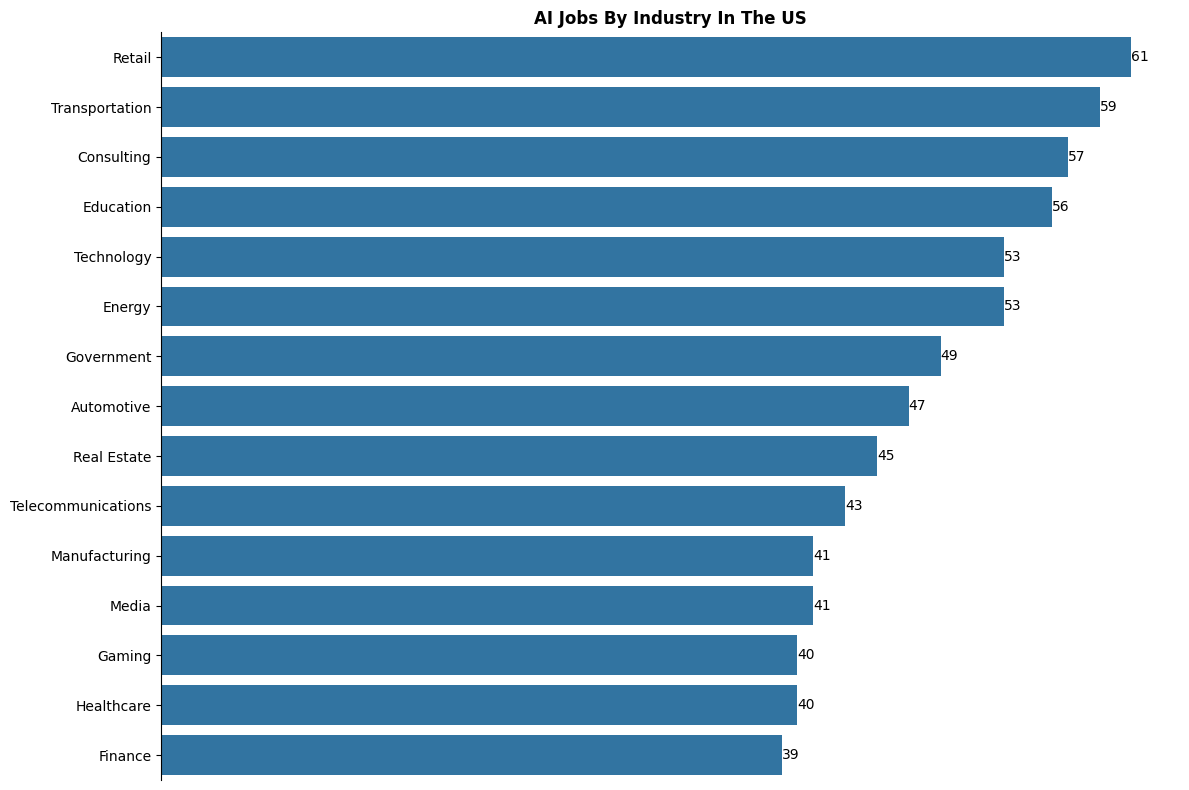

In [2]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=df_sorted, orient='h', ax=ax, x='value', y='industry')

ax.bar_label(ax.containers[0])
ax.set_title("AI Jobs By Industry In The US", fontweight="bold")
ax.set_ylabel("")
ax.xaxis.set_visible(False)
sns.despine(bottom=True)

plt.tight_layout()
plt.show()